In [23]:
%load_ext autoreload
%autoreload 2

# MWE of error in xgcm and ECCO

In [29]:
import xarray as xr
from xgcm import Grid

In [30]:
rootdir = '/Users/graemem/Documents/research/data/ECCO/v4r4/'

In [31]:
# shortwave
localdir = 'nctiles_monthly/MXLDEPTH/*/'
filename = 'MXLDEPTH_*.nc'
ds = xr.open_mfdataset(rootdir+localdir+filename)
ds = ds.rename({'tile':'face'})

In [32]:
localdir = 'nctiles_grid/'
filename = 'ECCO-GRID.nc'
grid = xr.open_dataset(rootdir+localdir+filename)
grid = grid.rename({'tile':'face'})
grid

<xarray.Dataset>
Dimensions:  (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50)
Coordinates:
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (face, j, i) float32 ...
    YC       (face, j, i) float32 ...
    XG       (face, j_g, i_g) float32 ...
    YG       (face, j_g, i_g) float32 ...
    CS       (face, j, i) float32 ...
    SN       (face, j, i) float32 ...
    Zl       (k_l) float32 ...
    Zu       (k_u) float32 ...
    Z        (k) float32 ...
    Zp1      (k_p1) float32 ...
    dxC      (face, j, i_g) float32 ...
    rAs      (face, j_g, i) float32 ...
    rAw      (face, j, i_g) float32 ...
    Depth    (face, j, i) float32 ...
    rA       (face, j, i) float32 ...
    dxG      (face, j_g, i) float32 ...
    dyG      (face, j, i_g) float32 ...
    rAz      (face, j_g, i_g) float32 ...
    dyC      (face, j_g, i) float32 ...
    PHrefC   (k) float32 ...
    drC      (k_p1) float32 ...
    PHrefF   (k_p1) float32 ...
    drF      (k) float32 ...
    hFacS    (k, face, j_g, i) float32 ...
    hFacC    (k, face, j, i) float32 ...
    hFacW    (k, face, j, i_g) float32 ...
    maskW    (k, face, j, i_g) bool ...
    maskC    (k, face, j, i) bool ...
    maskS    (k, face, j_g, i) bool ...
Data variables:
    *empty*
Attributes:
    date_created:  Mon Dec 30 11:13:26 2019
    title:         ECCOv4 MITgcm grid information

In [33]:
ds = xr.merge([ds,grid])
ds

<xarray.Dataset>
Dimensions:    (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, nv: 2, time: 1)
Coordinates:
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC         (face, j, i) float32 -111.6 -111.3 -110.9 ... -105.6 -111.9
    YC         (face, j, i) float32 -88.24 -88.38 -88.52 ... -88.03 -88.08 -88.1
    timestep   (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time       (time) datetime64[ns] 1992-01-16T12:00:00
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    XG         (face, j_g, i_g) float32 ...
    YG         (face, j_g, i_g) float32 ...
    CS         (face, j, i) float32 ...
    SN         (face, j, i) float32 ...
    Zl         (k_l) float32 0.0 -10.0 -20.0 ... -5.244e+03 -5.678e+03
    Zu         (k_u) float32 -10.0 -20.0 -30.0 ... -5.678e+03 -6.134e+03
    Z          (k) float32 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
    Zp1        (k_p1) float32 0.0 -10.0 -20.0 ... -5.678e+03 -6.134e+03
    dxC        (face, j, i_g) float32 ...
    rAs        (face, j_g, i) float32 ...
    rAw        (face, j, i_g) float32 ...
    Depth      (face, j, i) float32 ...
    rA         (face, j, i) float32 ...
    dxG        (face, j_g, i) float32 ...
    dyG        (face, j, i_g) float32 ...
    rAz        (face, j_g, i_g) float32 ...
    dyC        (face, j_g, i) float32 ...
    PHrefC     (k) float32 49.05 147.1 245.2 ... 4.944e+04 5.357e+04 5.794e+04
    drC        (k_p1) float32 5.0 10.0 10.0 10.0 ... 399.0 422.0 445.0 228.2
    PHrefF     (k_p1) float32 0.0 98.1 196.2 ... 5.145e+04 5.57e+04 6.018e+04
    drF        (k) float32 10.0 10.0 10.0 10.0 10.0 ... 387.5 410.5 433.5 456.5
    hFacS      (k, face, j_g, i) float32 ...
    hFacC      (k, face, j, i) float32 ...
    hFacW      (k, face, j, i_g) float32 ...
    maskW      (k, face, j, i_g) bool ...
    maskC      (k, face, j, i) bool ...
    maskS      (k, face, j_g, i) bool ...
Dimensions without coordinates: nv
Data variables:
    MXLDEPTH   (time, face, j, i) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>

In [34]:
# define the connectivity between faces
face_connections = {'face':
                    {0: {'X':  ((12, 'Y', False), (3, 'X', False)),
                         'Y':  (None,             (1, 'Y', False))},
                     1: {'X':  ((11, 'Y', False), (4, 'X', False)),
                         'Y':  ((0, 'Y', False),  (2, 'Y', False))},
                     2: {'X':  ((10, 'Y', False), (5, 'X', False)),
                         'Y':  ((1, 'Y', False),  (6, 'X', False))},
                     3: {'X':  ((0, 'X', False),  (9, 'Y', False)),
                         'Y':  (None,             (4, 'Y', False))},
                     4: {'X':  ((1, 'X', False),  (8, 'Y', False)),
                         'Y':  ((3, 'Y', False),  (5, 'Y', False))},
                     5: {'X':  ((2, 'X', False),  (7, 'Y', False)),
                         'Y':  ((4, 'Y', False),  (6, 'Y', False))},
                     6: {'X':  ((2, 'Y', False),  (7, 'X', False)),
                         'Y':  ((5, 'Y', False),  (10, 'X', False))},
                     7: {'X':  ((6, 'X', False),  (8, 'X', False)),
                         'Y':  ((5, 'X', False),  (10, 'Y', False))},
                     8: {'X':  ((7, 'X', False),  (9, 'X', False)),
                         'Y':  ((4, 'X', False),  (11, 'Y', False))},
                     9: {'X':  ((8, 'X', False),  None),
                         'Y':  ((3, 'X', False),  (12, 'Y', False))},
                     10: {'X': ((6, 'Y', False),  (11, 'X', False)),
                          'Y': ((7, 'Y', False),  (2, 'X', False))},
                     11: {'X': ((10, 'X', False), (12, 'X', False)),
                          'Y': ((8, 'Y', False),  (1, 'X', False))},
                     12: {'X': ((11, 'X', False), None),
                          'Y': ((9, 'Y', False),  (0, 'X', False))}}}

ds['drW'] = ds.hFacW * ds.drF #vertical cell size at u point
ds['drS'] = ds.hFacS * ds.drF #vertical cell size at v point
ds['drC'] = ds.hFacC * ds.drF #vertical cell size at tracer point

metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
    ('Z',): ['drW', 'drS', 'drC'], # Z distances
    ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
}

# create the grid object
xgrid = Grid(ds, periodic=False, face_connections=face_connections, metrics=metrics)
xgrid

<xgcm.Grid>
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
T Axis (not periodic, boundary=None):
  * center   time
Z Axis (not periodic, boundary=None):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center

In [35]:
# Calculate gradients in field
gx = xgrid.interp(ds['MXLDEPTH'], 'X')
gy = xgrid.interp(ds['MXLDEPTH'], 'Y', boundary='fill')
dg = xgrid.diff_2d_vector({'X':gx,'Y':gy}, boundary='fill')

In [36]:
dg

{'X': <xarray.DataArray 'sub-70463d6094bace60c4df61fd90805af6' (time: 1, face: 13, j: 90, i: 90)>
 dask.array<sub, shape=(1, 13, 90, 90), dtype=float32, chunksize=(1, 1, 90, 88), chunktype=numpy.ndarray>
 Coordinates:
   * time     (time) datetime64[ns] 1992-01-16T12:00:00
   * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
   * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
   * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89,
 'Y': <xarray.DataArray 'sub-ffa0baf11e1c5bbabd8c009736b9fb1d' (time: 1, face: 13, j: 90, i: 90)>
 dask.array<sub, shape=(1, 13, 90, 90), dtype=float32, chunksize=(1, 1, 88, 90), chunktype=numpy.ndarray>
 Coordinates:
   * time     (time) datetime64[ns] 1992-01-16T12:00:00
   * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
   * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
   * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89}

In [39]:
xgrid.interp(ds['dxG'],'Y')

ValueError: 'i_g' not found in array dimensions ('face', 'j_g', 'i')

In [43]:
dgx = xgrid.diff(ds['MXLDEPTH'], 'X')
dgdx = dgx/xgrid.get_metric(dgx,'X')
dgy = xgrid.diff(ds['MXLDEPTH'], 'Y',boundary='fill')
dgdy = dgy/xgrid.get_metric(dgy,'Y')

In [45]:
xgrid.interp(dgdy,'Y')

ValueError: 'i_g' not found in array dimensions ('time', 'face', 'j_g', 'i')

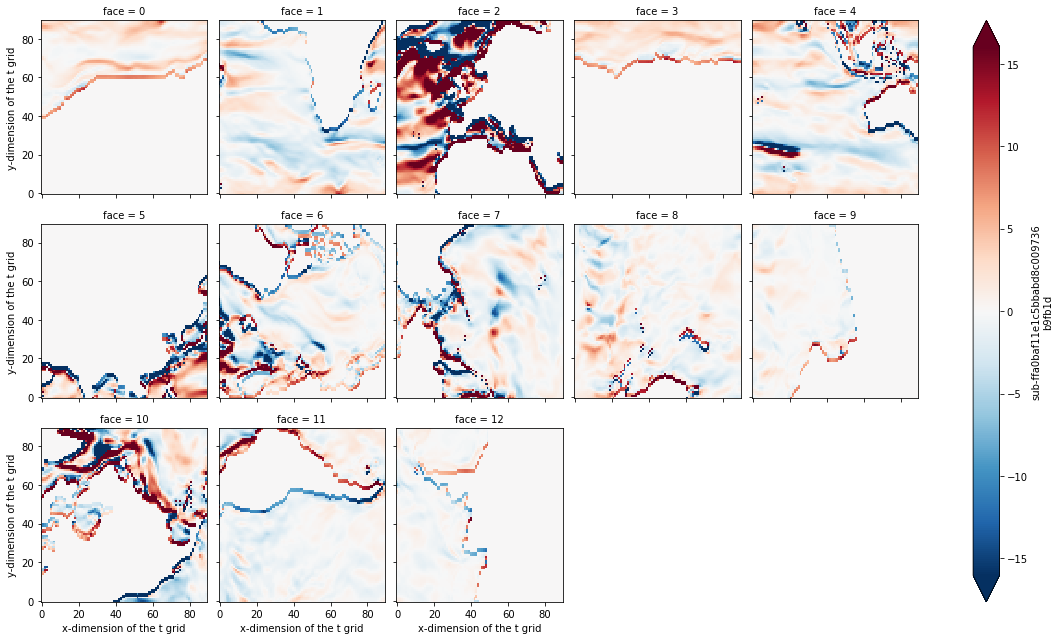

In [24]:
dg['Y'].isel(time=0).plot(col='face', col_wrap=5, robust = True)

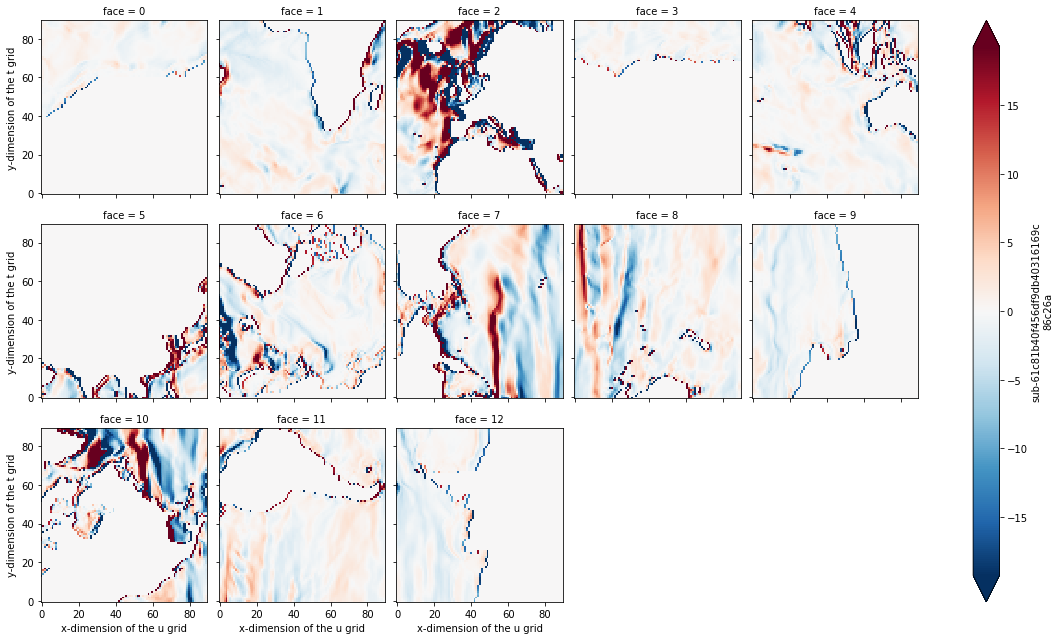

In [47]:
dg.isel(time=0).plot(col='face', col_wrap=5, robust = True)

In [47]:
gxg = xgrid.interp(dg ,'Y', boundary = 'fill')

ValueError: 'i' not found in array dimensions ('time', 'face', 'j', 'i_g')